# Using astropy to inspect the cosmos

Let's combine pandas, matplotlib and astropy to provide some interesting views of our universe.

In [1]:
# We're chaining the "back-end" of matplotlib so that we can interactive graphics!
%matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from astropy import units as u 
from astropy.coordinates import SkyCoord, Angle, Galactocentric
from astropy.cosmology import WMAP9 as cosmo
from colors import colors

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
galaxy_clusters = pd.read_csv('../data/abell-galaxy-clusters-simplified.csv')
star_clusters = pd.read_csv('../data/star-clusters.csv')

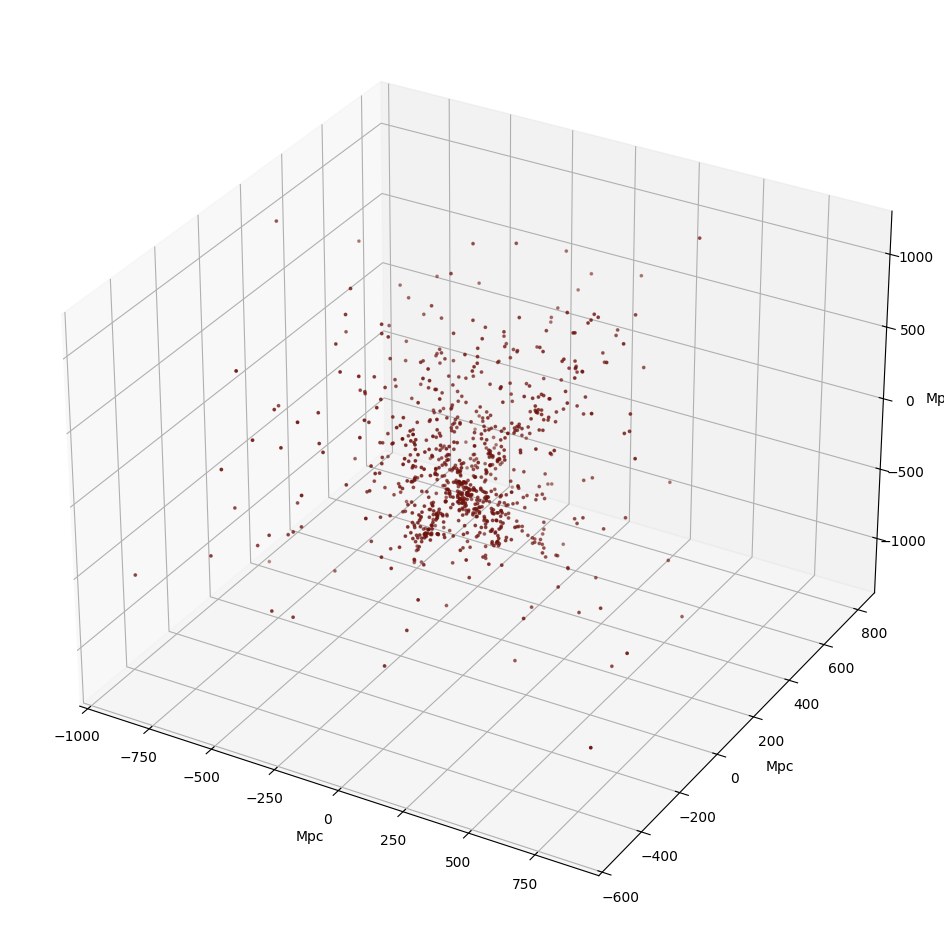

In [ ]:
# Let's plot the galaxy clusters in a 3D view

# A convenience function to transform the data so it can be plotted easier
def to_galacto_centric(long, lat, redshift):
    distance = cosmo.comoving_distance(redshift)
    sc = SkyCoord(l=long * u.degree, b=lat * u.degree,
                  distance=distance, frame='galactic')
    gc = sc.transform_to(Galactocentric)
    return [gc.x.value, gc.y.value, gc.z.value]

rds = galaxy_clusters[galaxy_clusters['Redshift'].notna()]

cs = np.array([
    to_galacto_centric(row.GLON_2000, row.GLAT_2000, row.Redshift)
    for row in rds.itertuples()
])

# This will pop-up an interactive window that you should be able to pan
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(cs[:, 0], cs[:, 1], cs[:, 2], s=3, c=colors['red'])
ax.set_xlabel('Mpc')
ax.set_ylabel('Mpc')
ax.set_zlabel('Mpc')
ax.grid(True);

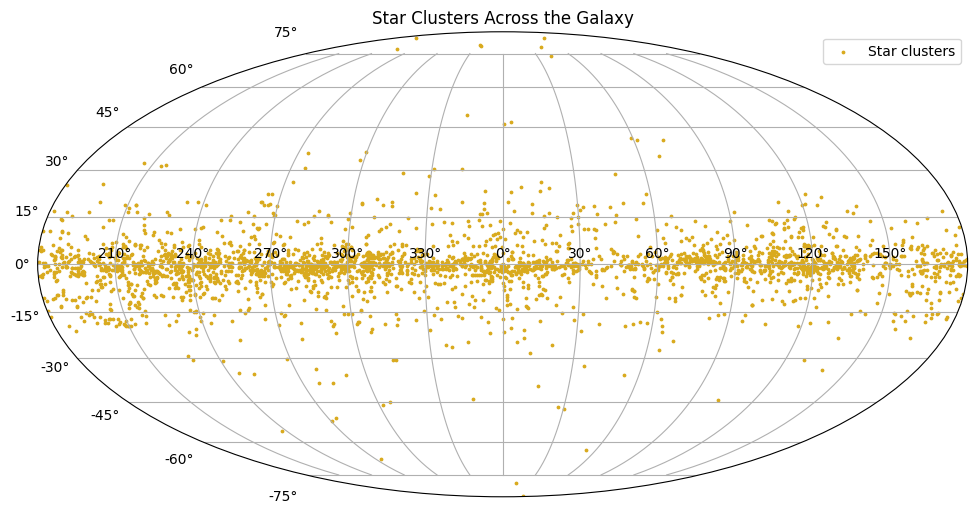

In [23]:
# Let's plot star clusters

# A convenience function to transform the data so it can be plotted easier
def to_galactic(ra, dec):
    sc = SkyCoord(ra=ra * u.hourangle, dec=dec*u.degree)
    return [sc.galactic.l.value, sc.galactic.b.value]

# Convert source right ascension & declination to galactic coordinates
sc = np.array([
    to_galactic(row.RAhour, row.DEdeg)
    for row in star_clusters.itertuples()
])

star_long = Angle(sc[:, 0] * u.degree)
star_long = star_long.wrap_at(180 * u.degree)
star_lat = Angle(sc[:, 1] * u.degree)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='mollweide')
ax.set_title('Star Clusters Across the Galaxy')
line1 = ax.scatter(star_long.radian, star_lat.radian, s=3, c=colors['yellow'])
ax.set_xticklabels(['210°', '240°', '270°', '300°', '330°',
                    '0°', '30°', '60°', '90°', '120°', '150°'])
ax.legend([line1], ['Star clusters'])
ax.grid(True)

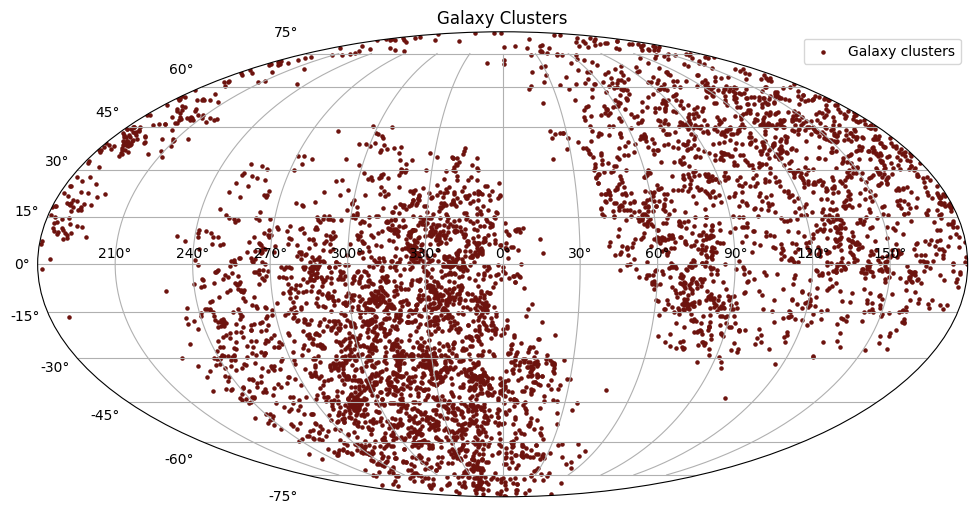

In [31]:
# Let's plot the galaxy clusters across the galactic plane

gc = np.array([
    SkyCoord(ra = row.RA_2000 * u.degree, dec = row.Dec_2000 * u.degree)
    for row in galaxy_clusters.itertuples()
])

gal_long = Angle([g.galactic.l.value for g in gc] * u.degree)
gal_long = gal_long.wrap_at(180 * u.degree)
gal_lat = Angle([g.galactic.b.value for g in gc] * u.degree)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='mollweide')
ax.set_title('Galaxy Clusters')
line1 = ax.scatter(gal_long.radian, gal_lat.radian, s=5, c=colors['red'])
ax.set_xticklabels(['210°', '240°', '270°', '300°', '330°',
                    '0°', '30°', '60°', '90°', '120°', '150°'])
ax.legend([line1], ['Galaxy clusters'])
ax.grid(True)

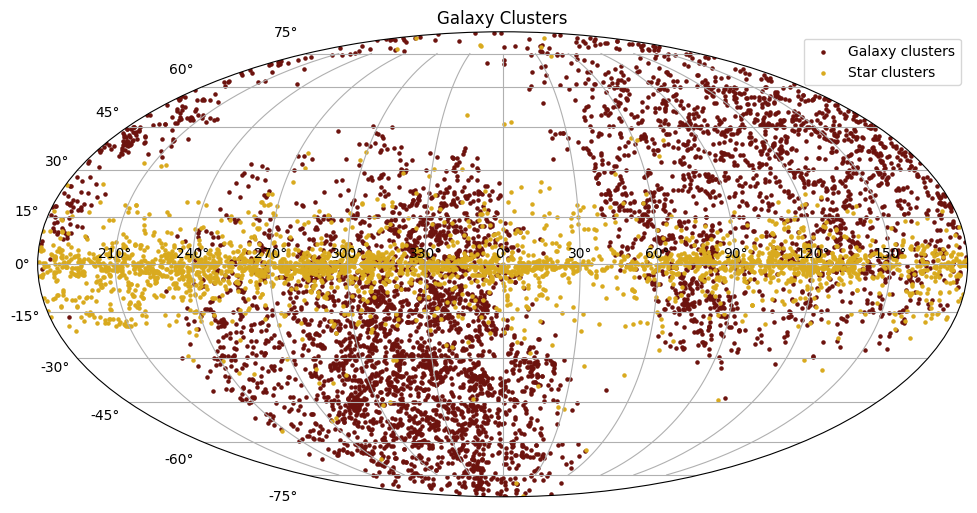

In [32]:
# Let's combine both views of clusters!

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='mollweide')
ax.set_title('Galaxy Clusters')
line1 = ax.scatter(gal_long.radian, gal_lat.radian, s=5, c=colors['red'])
line2 = ax.scatter(star_long.radian, star_lat.radian, s=5, c=colors['yellow'])
ax.set_xticklabels(['210°', '240°', '270°', '300°', '330°',
                    '0°', '30°', '60°', '90°', '120°', '150°'])
ax.legend([line1, line2], ['Galaxy clusters', 'Star clusters'])
ax.grid(True)
